Exercises I - Required

Our Telco scenario continues:

As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

Do your work in a notebook named explore.ipynb. In addition, you should create a file named explore.py that contains the following functions for exploring your variables (features & target).

Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

Explore your dataset with any other visualizations you think will be helpful.

In a seperate notebook, use the functions you have developed in this exercise with the mall_customers dataset in the Codeup database server. You will need to write a sql query to acquire your data. Make spending_score your target variable.



In [46]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import MinMaxScaler, RobustScaler

import scipy.stats as stats

import wrangle
import prepare

In [2]:
df =  wrangle.wrangle_telco()

In [3]:
def distribution_single_var (df):
    '''
    Take in a train_df and return a distributions of single varibles
    '''
    columns = df.columns.to_list()
    for col in columns:
            #plot
            plt.show()
            plt.figure(figsize=(8, 6))
            sns.displot(df[col])
            plt.title(col)
            plt.show()

    return
        

<Figure size 576x432 with 0 Axes>

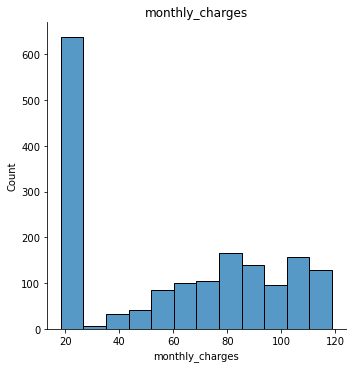

<Figure size 576x432 with 0 Axes>

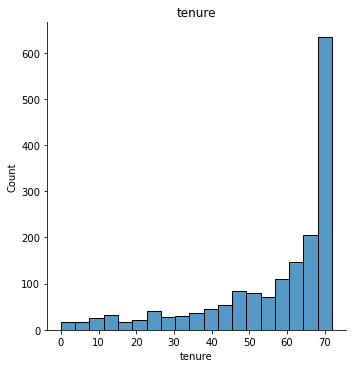

<Figure size 576x432 with 0 Axes>

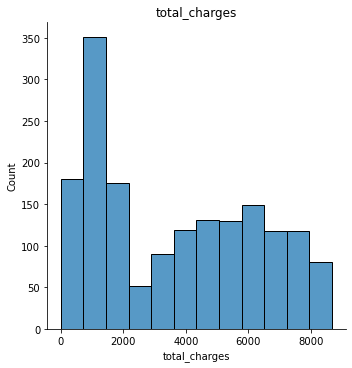

In [4]:
distribution_single_var(df.drop(columns='customer_id'))

In [5]:
train, validate, test = wrangle.split_data(df)

train -> (949, 4)
validate -> (407, 4)
test -> (339, 4)


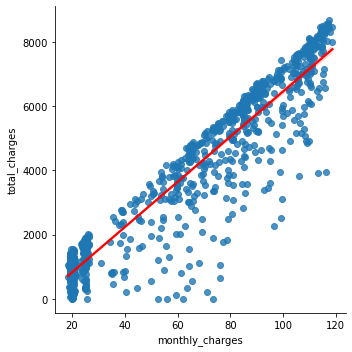

In [6]:
# plot for one pair
sns.lmplot(x="monthly_charges", y="total_charges", data=train, line_kws={'color': 'red'})
plt.show()

In [7]:
#set my target
y= 'total_charges'

In [8]:
#get the list of the columns  that are not object type
columns = list(train.select_dtypes(exclude= 'O').columns)
columns

['monthly_charges', 'tenure', 'total_charges']

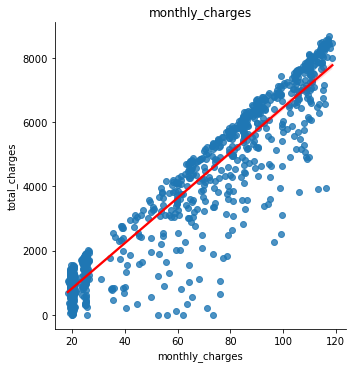

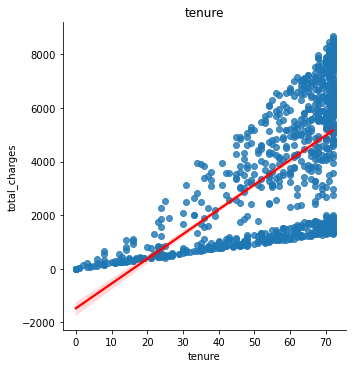

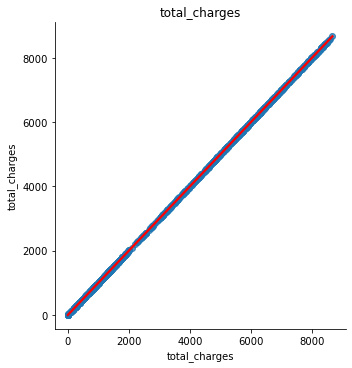

In [9]:
#lets do for more than one pair
for col in columns:
    sns.lmplot(x= col, y=y, data=train, line_kws={'color': 'red'})
    plt.title(col)
    plt.show()

In [10]:
#lets create a function

def plot_variable_pairs(df, target):
    '''
    Takes in a dataframe and a target and returns  plots of all the pairwise relationships 
    along with the regression line for each pair.
    '''
    
    # get the list of the columns  that are not object type
    columns = list(train.select_dtypes(exclude= 'O').columns)
    #remove target from columns
    columns.remove(target)
    
    #plot
    for col in columns:
        sns.lmplot(x= col, y= target, data=df, line_kws={'color': 'red'})
        plt.title(col)
        plt.show()
    return
    

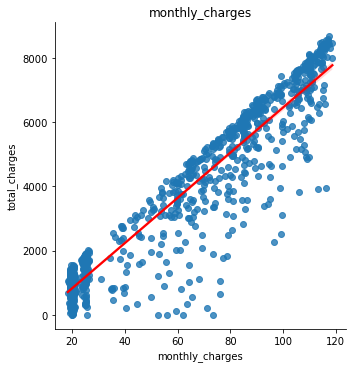

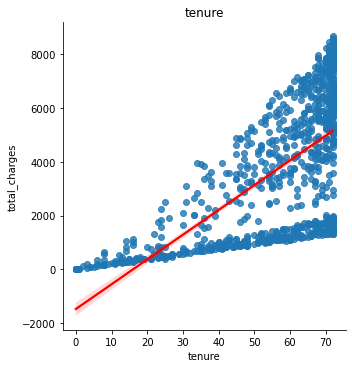

In [11]:
plot_variable_pairs (train, 'total_charges')

In [12]:
def plot_variable_pairs2(df):
    
    columns = df[list(df.select_dtypes(exclude='O').columns)]
    
    sns.pairplot(columns, kind="reg", plot_kws={'line_kws':{'color':'red'}}, corner=True)
    plt.show()

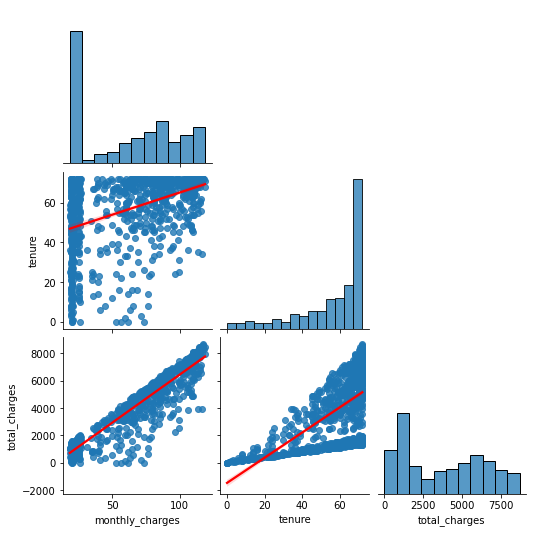

In [13]:
plot_variable_pairs2(train)

In [14]:
#how I calculate years
train['tenure'] /12

5306    5.083333
894     4.583333
2788    5.583333
2658    4.833333
3583    4.916667
          ...   
1826    6.000000
384     5.750000
3792    6.000000
1345    3.833333
6628    3.166667
Name: tenure, Length: 949, dtype: float64

In [15]:
# using  // gives you completed years. (**floor division discards the fractional part***)
(train['tenure']//12).head()

5306    5
894     4
2788    5
2658    4
3583    4
Name: tenure, dtype: int64

In [16]:
#create a new column
train['tenure_years'] = (train['tenure']//12)

In [17]:
train['tenure_years'].head()

5306    5
894     4
2788    5
2658    4
3583    4
Name: tenure_years, dtype: int64

In [18]:
def months_to_years (df):
    '''
    Takes in the telco_churn dataframe and returns a dataframe with a new feature tenure_years, 
    in complete years as a customer
    '''
    df['tenure_years'] = (df['tenure']//12).astype('object')
    

In [19]:
months_to_years (df)

In [20]:
df.head()

,customer_id,monthly_charges,tenure,total_charges,tenure_years
6,0013-SMEOE,109.70,71,7904.25,5
7,0014-BMAQU,84.65,63,5377.80,5
9,0016-QLJIS,90.45,65,5957.90,5
10,0017-DINOC,45.20,54,2460.55,4
11,0017-IUDMW,116.80,72,8456.75,6


In [21]:
#lest see the vaues, tenure_years is categorical
train['tenure_years'].value_counts().sort_index(ascending= True)

0     32
1     48
2     59
3     99
4    154
5    362
6    195
Name: tenure_years, dtype: int64

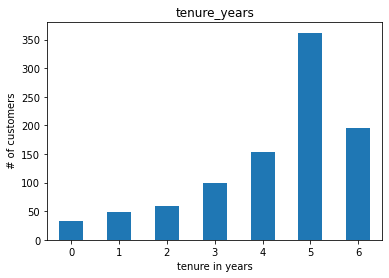

In [22]:
train['tenure_years'].value_counts().sort_index(ascending= True).plot.bar()
plt.title('tenure_years')
plt.xlabel('tenure in years')
plt.ylabel(' # of customers')
plt.xticks(rotation='horizontal')
plt.show()

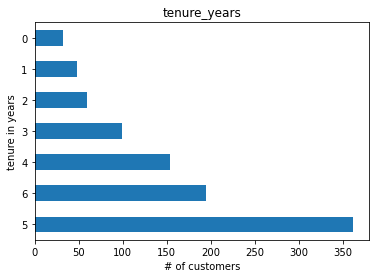

In [23]:
train['tenure_years'].value_counts().plot.barh()
plt.title('tenure_years')
plt.xlabel('# of customers')
plt.ylabel('tenure in years')
plt.xticks(rotation='horizontal')
plt.show()

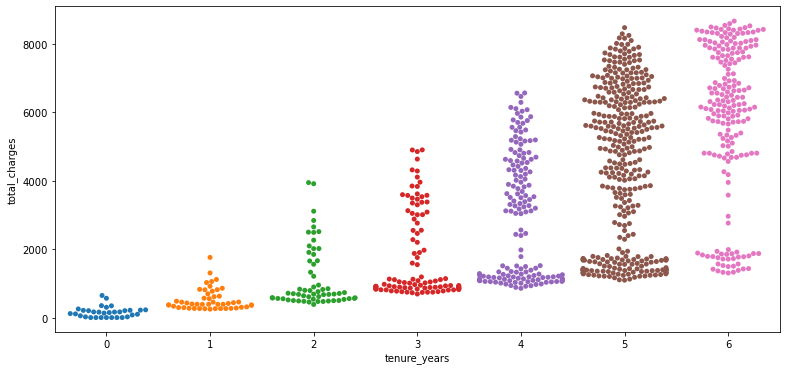

In [24]:
plt.figure(figsize=(13, 6))
sns.swarmplot(x='tenure_years', y='total_charges', data=train)
plt.show()

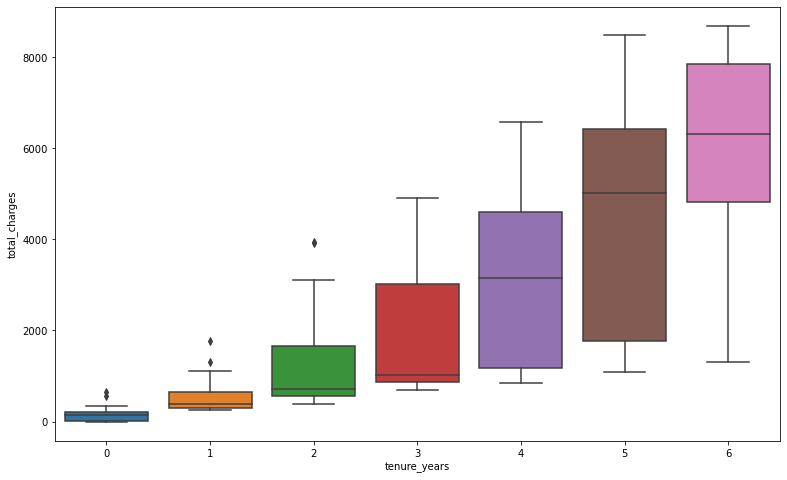

In [25]:
plt.figure(figsize=(13, 8))
sns.boxplot(x='tenure_years', y='total_charges', data=train)
plt.show()

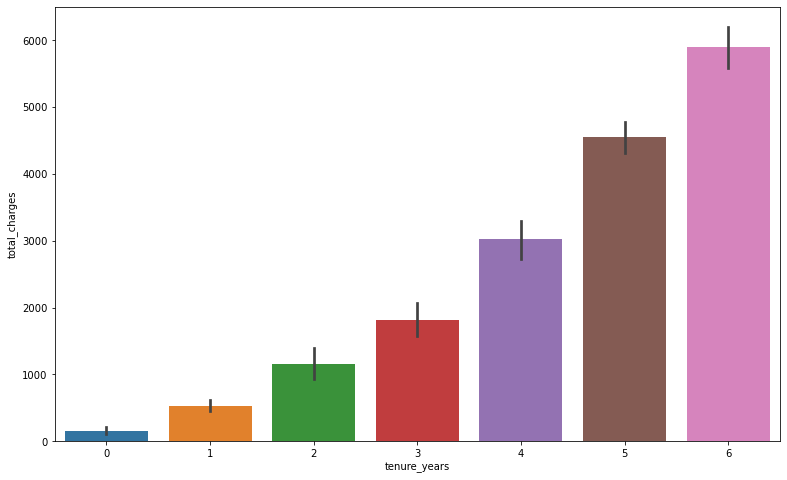

In [26]:
plt.figure(figsize=(13, 8))
sns.barplot(x='tenure_years', y='total_charges', data=train)
plt.show()

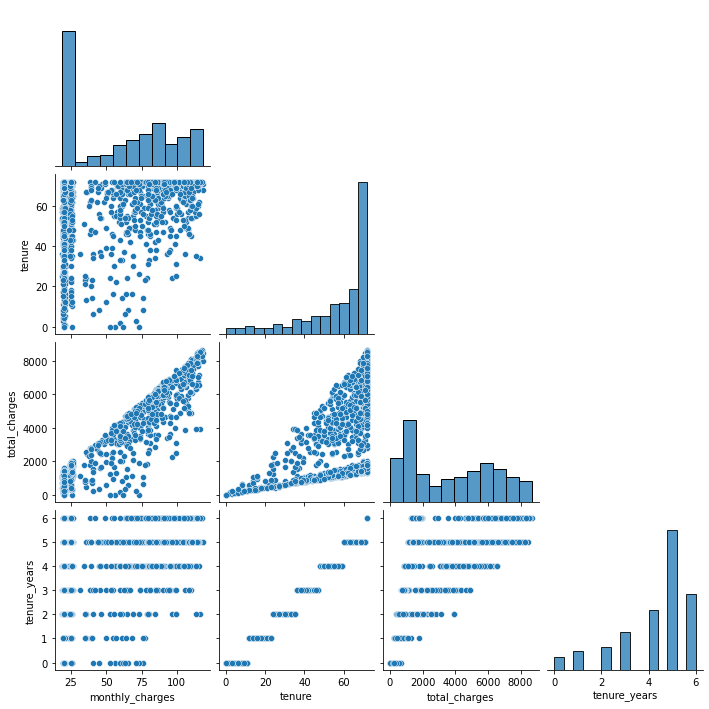

In [27]:
# We can drop the redundant information in the upper right half of the chart
sns.pairplot(train, corner=True)

In [28]:
def plot_categorical_and_continuous_vars (df, categorical, continuous):
    print('Discrete with Continuous')
    plt.figure(figsize=(13, 6))
    for cat in categorical:
        for cont in continuous:
            sns.boxplot(x= cat, y=cont, data=df)
            plt.show()
            sns.swarmplot(x=cat, y=cont, data=train)
            plt.show()
    print('Continuous with Continuous')        
    sns.pairplot(df[continuous], kind="reg", plot_kws={'line_kws':{'color':'red'}}, corner=True)
    return

Discrete with Continuous


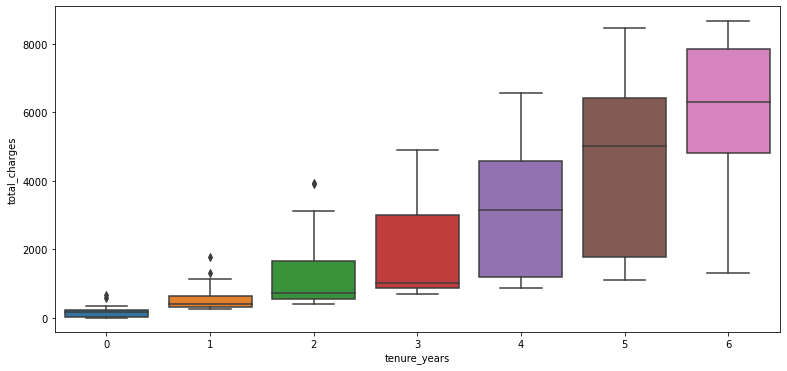

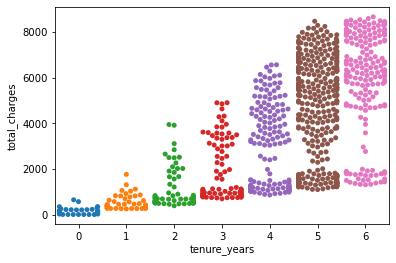

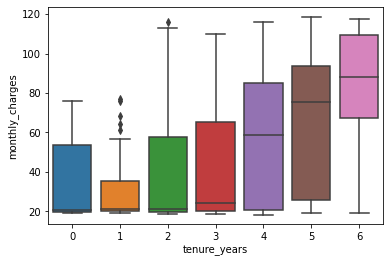

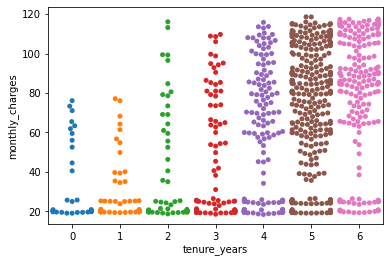

Continuous with Continuous


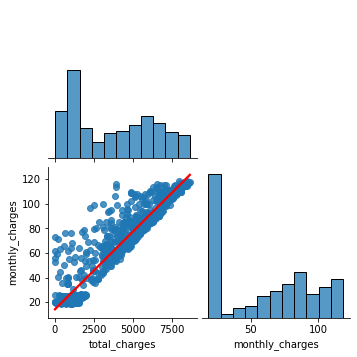

In [29]:
plot_categorical_and_continuous_vars (train, ['tenure_years'], ['total_charges','monthly_charges'])

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

Come up with some initial hypotheses based on your goal of predicting property value.

Visualize all combinations of variables in some way.

Run the appropriate statistical tests where needed.

What independent variables are correlated with the dependent variable, home value?

Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

In [30]:
df = wrangle.get_zillow()

In [31]:
df.head()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips
0,13081610,3.0,2.0,1324.0,518089.0,1963.0,6037.0
1,13072593,4.0,3.0,3551.0,1609238.0,1994.0,6037.0
2,10712949,4.0,3.0,2519.0,106406.0,1965.0,6037.0
3,12380151,3.0,2.0,1285.0,369853.0,1955.0,6037.0
4,12422102,3.0,1.0,1254.0,65848.0,1954.0,6037.0


In [32]:
df = wrangle.clean_zillow(df)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52200 entries, 0 to 52440
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   parcel_id        52200 non-null  object 
 1   number_bedroom   52200 non-null  float64
 2   number_bathroom  52200 non-null  float64
 3   sqft             52200 non-null  float64
 4   tax_value        52200 non-null  float64
 5   geographic_code  52200 non-null  float64
 6   age              52200 non-null  float64
dtypes: float64(6), object(1)
memory usage: 3.2+ MB


In [34]:
cols = [ 'number_bedroom','number_bathroom','sqft','tax_value','geographic_code','age']

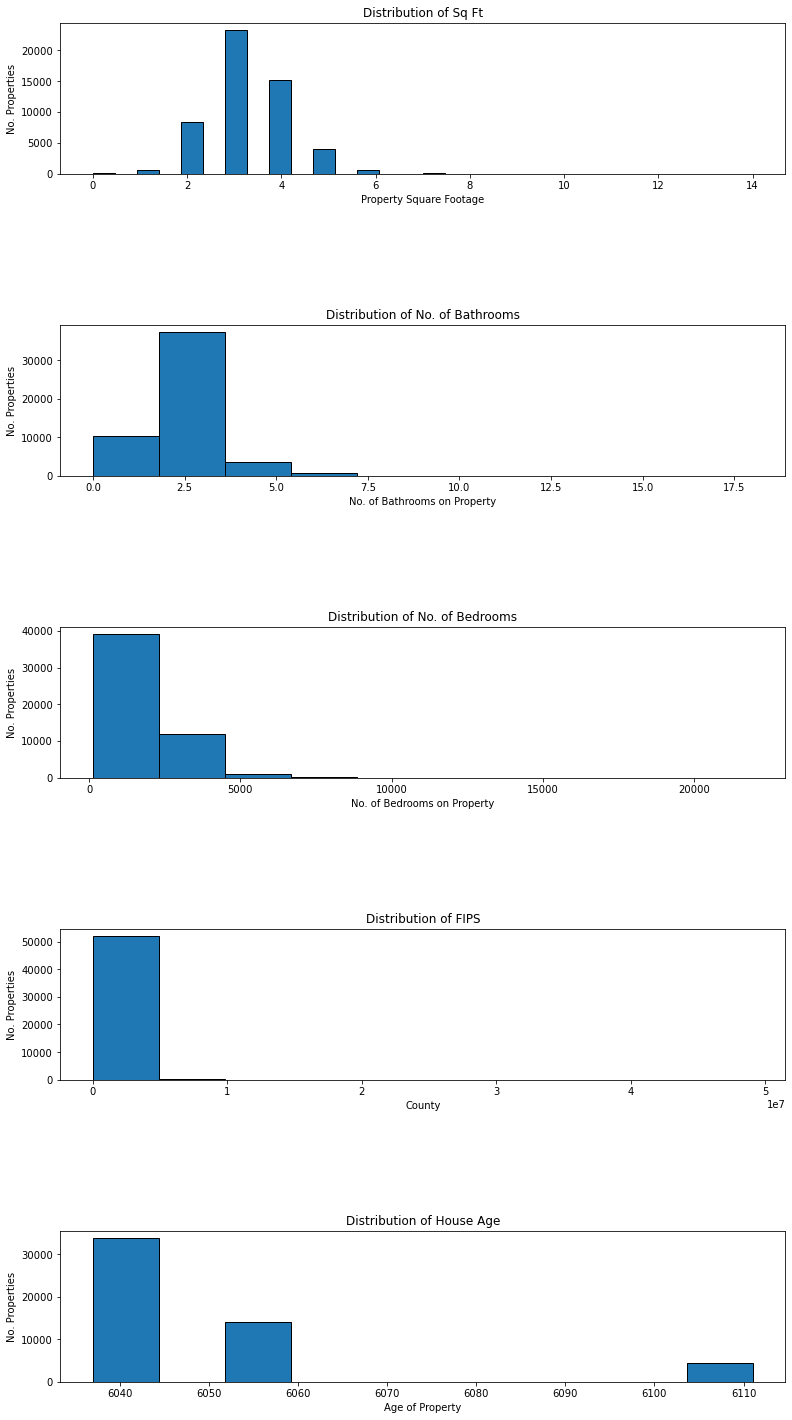

In [35]:
wrangle.distribution_plot(df, cols)

In [36]:
train, validate, test = wrangle.split_data(df)

train -> (29232, 7)
validate -> (12528, 7)
test -> (10440, 7)


In [37]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.split_Xy (train, validate, test,'tax_value' )

X_train -> (29232, 6)               y_train->(29232,)
X_validate -> (12528, 6)         y_validate->(12528,) 
X_test -> (10440, 6)                  y_test>(10440,)


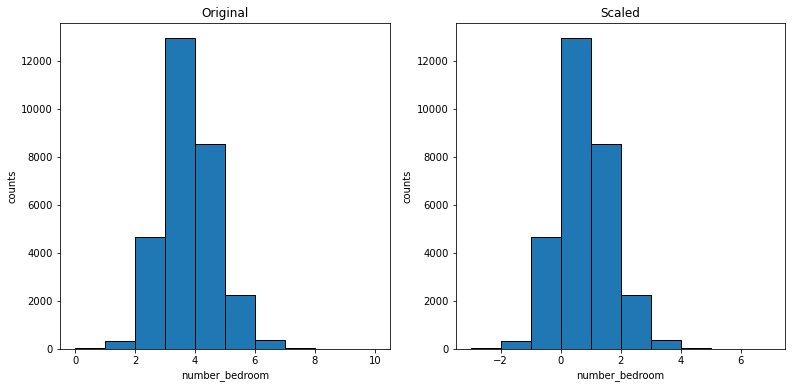

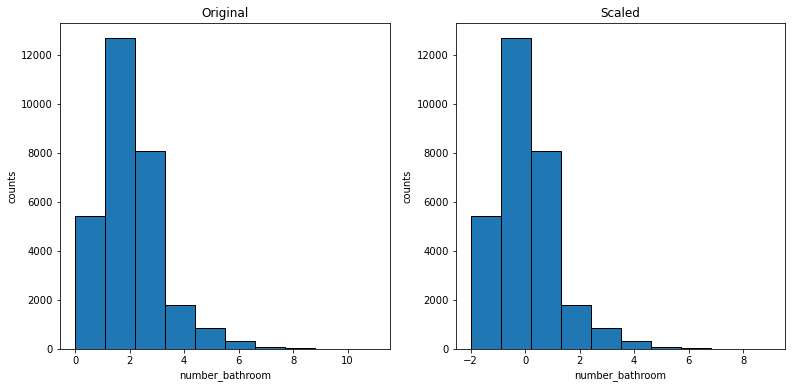

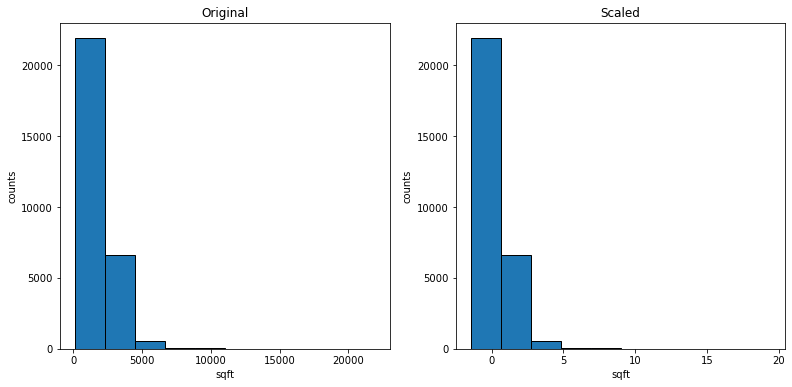

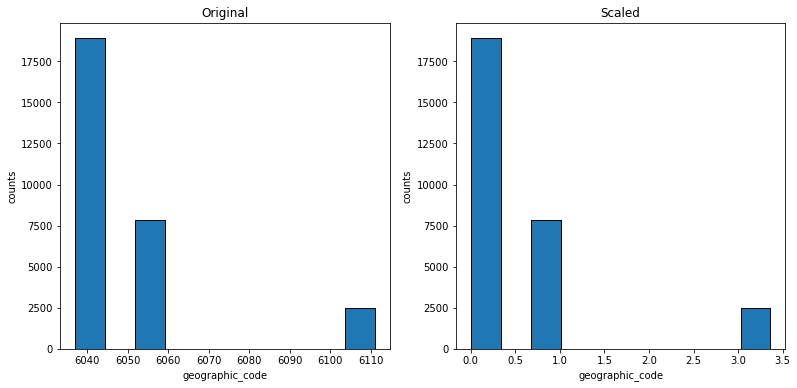

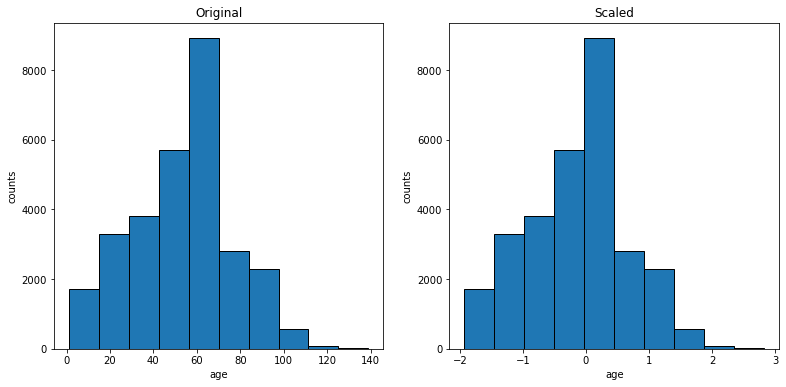

In [39]:
X_train_scaled, X_validate_scaled, X_test_scaled = wrangle.scaled_df(X_train, X_validate, X_test, RobustScaler())

- T-test
Is any diference in the average of assessed_value_usd for 2 bedrooms vs 3 o bedrooms properties?

𝐻𝑜 : There is no difference in the average of assessed_value_usd for the properties with 3 bedrooms vs 2 bedrooms
𝐻𝑎 : There is significant difference in the average of assessed_value_usd for the properties with 3 bedrooms vs 2 bedrooms

In [40]:
# Set Significance Level
alpha = 0.05

In [42]:
X_train_scaled.head()

,number_bedroom,number_bathroom,sqft,geographic_code,age
14807,1.0,0.5,0.245387,1.000000,-0.896552
3796,1.0,1.5,0.507069,3.363636,-0.310345
39652,0.0,0.5,0.131320,1.000000,-0.586207
30227,1.0,2.0,2.023484,3.363636,-1.413793
2285,1.0,2.5,1.542296,1.000000,-1.862069


In [49]:
bedroom_2 = X_train_scaled[X_train_scaled.number_bathroom == 2].age
bedroom_3 = X_train_scaled[X_train_scaled.number_bedroom == 3 ].age

In [50]:
#Normal Distribution
bedroom_2.shape, bedroom_3.shape

((1279,), (362,))

In [51]:
#Compute Test Statistic
t, p = stats.ttest_ind(bedroom_2, bedroom_3, equal_var = False)
t,p

(-1.7273759784642961, 0.08466644803625024)

In [52]:
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


Are bathrooms and bedrooms linearly correlated?

𝐻𝑜 : There is not a linear correlation between number of bathrooms and number of bedrooms for a property.

𝐻𝑎 : There is a linear correlation between number of bathrooms and number of bedrooms for a property.

In [56]:
r, p = stats.pearsonr(X_train_scaled.number_bathroom, X_train_scaled.number_bedroom)
r, p

(0.648113229181676, 0.0)

In [57]:
if (p < alpha):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


Takeaways

What independent variables are correlated with tax_value?

my surprise is bathrooms have higher correlation with our target than bedrooms
sq_ft looks to be the best predictor of our target variable
Which independent variables are correlated with other independent variables?

bathrooms and bedrooms are correlated (if bedrooms increase also bathrooms tend to increase)
bathroom and sq_ft have stronger correlation